# Road Lane Detection using FCN (Fully Convolutional Network)

Found 7252 images belonging to 2 classes.
Batch 0
Batch 10
Batch 20
Batch 30
Batch 40
Batch 50
Batch 60
Batch 70
Batch 80
Batch 90
Batch 100
Batch 110


(2000, 256, 320, 3)

(2000, 256, 320)

Shape of X_train: (1800, 256, 320, 3)
Shape of X_val: (200, 256, 320, 3)
Shape of Y_train: (1800, 256, 320, 1)
Shape of Y_val: (200, 256, 320, 1)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 256, 320, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional (Functional)         │ (None, 32, 40, 512)    │     1,460,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 40, 256)    │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 64, 80, 256)    │       262,400 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 80, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 128, 160, 128)  │        65,664 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 128, 160, 64)   │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 256, 320, 64)   │        16,448 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 256, 320, 1)    │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,353,409 (12.79 MB)

 Trainable params: 2,735,809 (10.44 MB)

 Non-trainable params: 617,600 (2.36 MB)

Epoch 1/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 1894s 8s/step - accuracy: 0.9449 - loss: 0.0340 - val_accuracy: 0.9754 - val_loss: 0.0157
Epoch 2/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 1514s 7s/step - accuracy: 0.9768 - loss: 0.0145 - val_accuracy: 0.9760 - val_loss: 0.0151
Epoch 3/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 1927s 9s/step - accuracy: 0.9788 - loss: 0.0129 - val_accuracy: 0.9773 - val_loss: 0.0142
Epoch 4/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 1125s 5s/step - accuracy: 0.9805 - loss: 0.0118 - val_accuracy: 0.9784 - val_loss: 0.0135
Epoch 5/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 1629s 7s/step - accuracy: 0.9815 - loss: 0.0111 - val_accuracy: 0.9771 - val_loss: 0.0142


7/7 ━━━━━━━━━━━━━━━━━━━━ 51s 7s/step


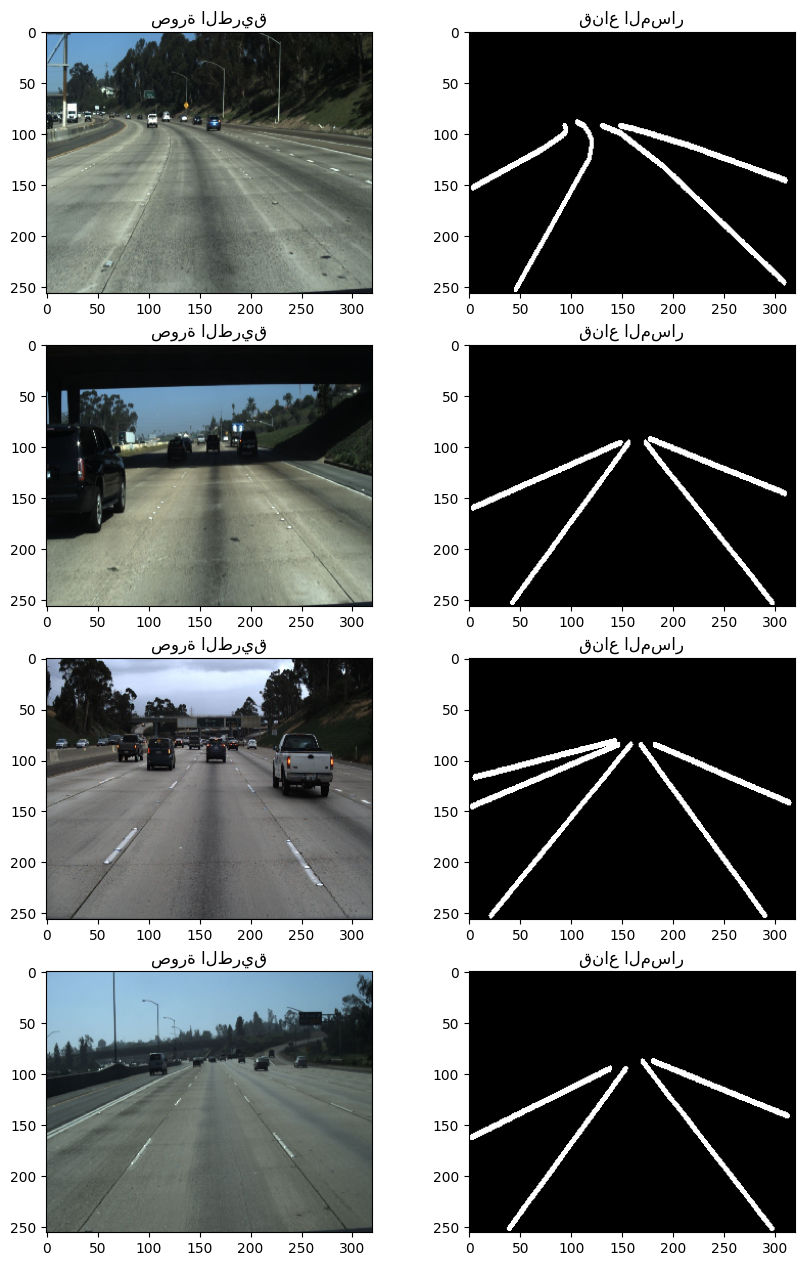

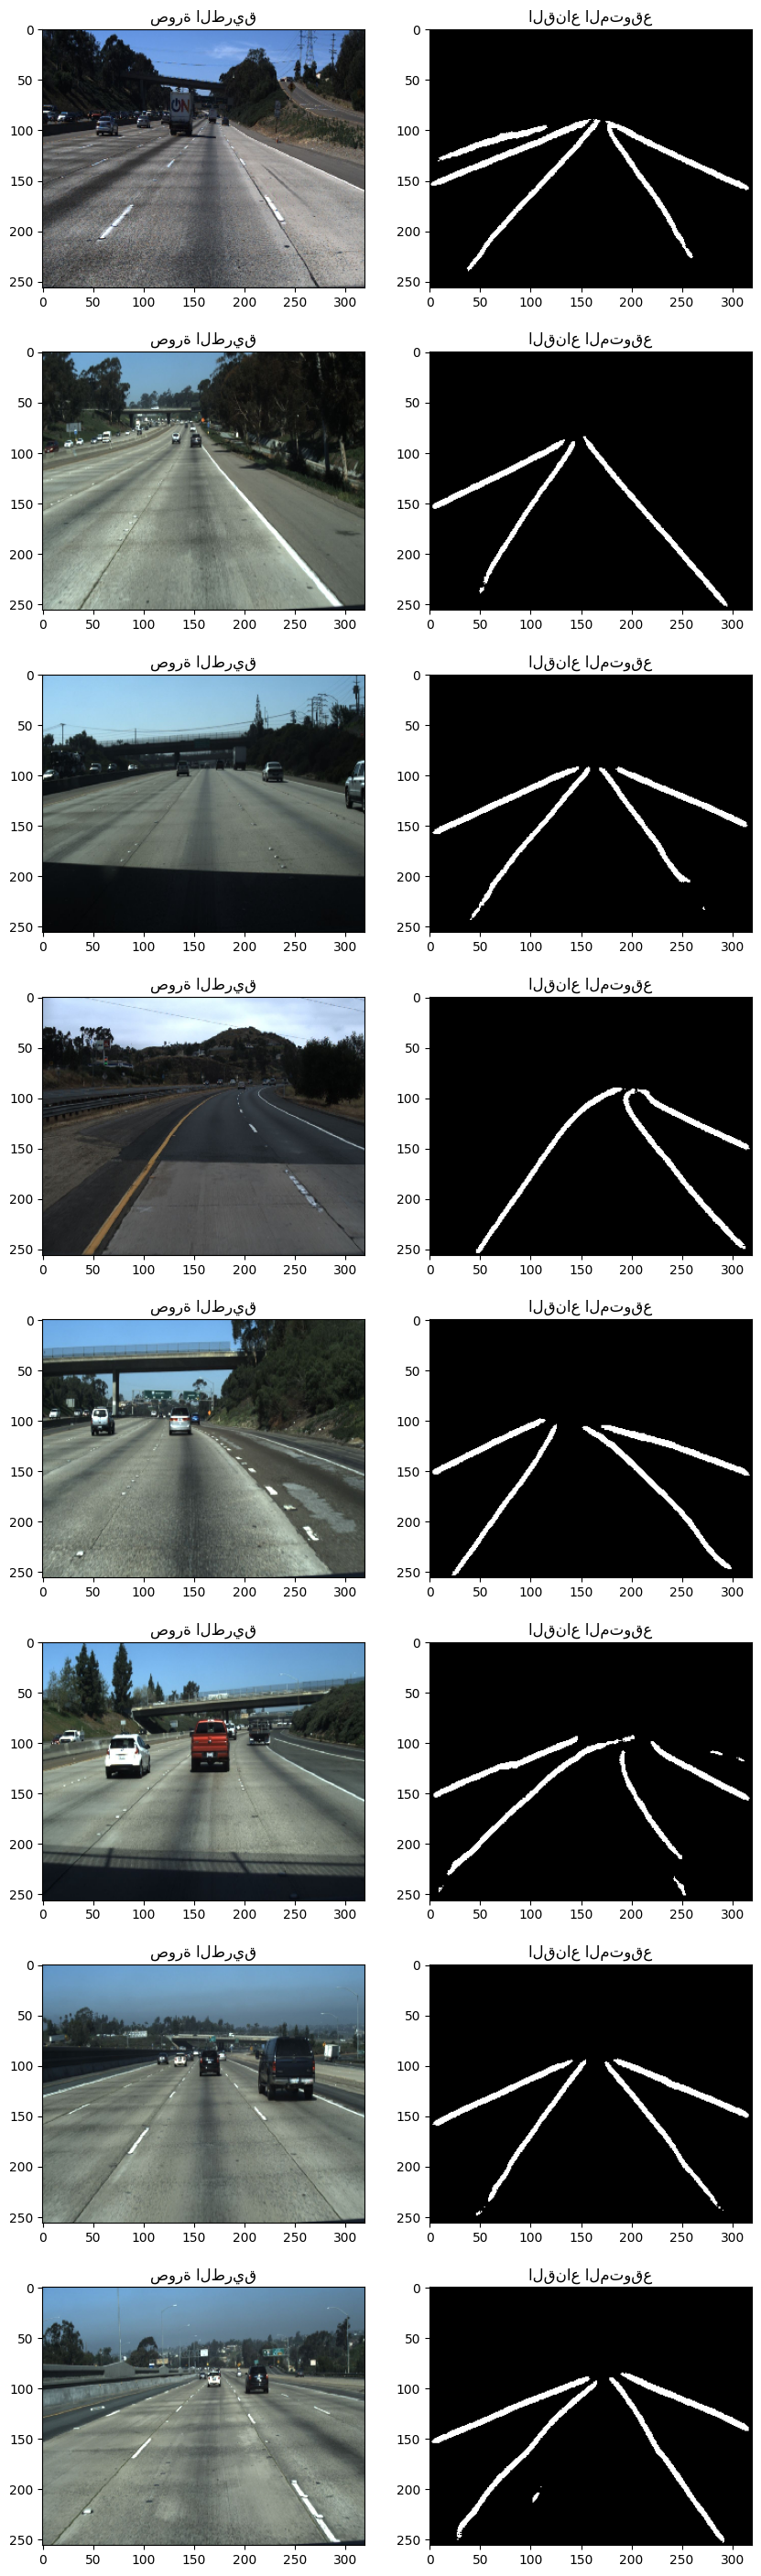

In [1]:
# استيراد المكتبات المطلوبة
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import os  # استيراد مكتبة للتعامل مع الملفات والمسارات

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, Sequential

# مسار بيانات التدريب
train_path = 'C:\\Users\\mahmo\\OneDrive\\Desktop\\project_graduation\\data_lane\\tusimple_preprocessed\\training'

# إنشاء مولد صور لتحميل البيانات
img_generator = keras.preprocessing.image.ImageDataGenerator()
seed = 10
images_set = img_generator.flow_from_directory(
    train_path,
    shuffle=False,
    batch_size=64,
    class_mode='binary',
    target_size=(256, 320)
)

# تعيين الصور إلى مجموعتين: صور الطرق إلى 'X' وأقنعة المسارات إلى 'Y'
num_images = 7252  # عدد الصور في مجموعة البيانات
num_batches = num_images // 64 + 1

# تهيئة قوائم فارغة لتخزين الصور
X = []
Y = []

# استخراج الصور من المولد
for i in range(num_batches):
    batch = next(images_set)
    batch_images = batch[0]  # الصور
    batch_labels = batch[1]  # التصنيفات (0 أو 1)
    for ind, lb in enumerate(batch_labels):
        # إذا كانت التسمية 0 فهي صورة للطريق، وإذا كانت 1 فهي قناع
        if lb == 0: 
            X.append(batch_images[ind])
        else:
            Y.append(np.mean(batch_images[ind], axis=2))  # الأقنعة باللون الرمادي
    if i % 10 == 0:
        print(f'Batch {i}')

# تحويل القوائم إلى مصفوفات Numpy
X = np.array(X)
Y = np.array(Y)

# خلط البيانات
from sklearn.utils import shuffle
X, Y = shuffle(X, Y, random_state=100)

# أخذ 2000 عينة فقط لتوفير الموارد
X = np.array(X[:2000])
Y = np.array(Y[:2000])
display(X.shape)
display(Y.shape)

# تطبيع الأقنعة وتحويلها إلى قيم ثنائية (0 أو 1)
Y = (Y >= 100).astype('int').reshape(-1, 256, 320, 1)
Y.min(), Y.max()

# تقسيم البيانات إلى مجموعتي تدريب وتحقق
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=.1, random_state=100)
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_val:", Y_val.shape)

# تحرير الذاكرة
import gc
del X, Y, images_set
gc.collect()

# عرض عينات من مجموعة التدريب
plt.figure(figsize=(10, 40))
s, e = 80, 84
index = 1

for i, j in zip(X_train[s:e], Y_train[s:e]):
    plt.subplot(10, 2, index)
    plt.imshow(i/255.)
    plt.title('صورة الطريق')

    plt.subplot(10, 2, index+1)
    plt.imshow(j, cmap='gray')
    plt.title('قناع المسار')
    index += 2

# بناء هيكل النموذج
from keras.layers import Input, Conv2DTranspose, Conv2D, MaxPooling2D
from keras.applications.resnet50 import ResNet50

# شكل مدخلات الصور
input_shape = (256, 320, 3)

# استخدام ResNet50 كجزء من الترميز
encoder = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# اختيار طبقة "conv3_block4_out" لتقليص حجم المدخلات
for i, layer in enumerate(encoder.layers):
    if layer.name == 'conv3_block4_out':
        break

# إنشاء نموذج جديد حتى طبقة معينة
encoder = tf.keras.Model(inputs=encoder.inputs, outputs=encoder.layers[i].output)

# تثبيت أوزان طبقات الترميز
for layer in encoder.layers[:50]:
    layer.trainable = False

# تعريف الديكودر (Decoder)
def decoder(inputs):
    conv1 = Conv2D(256, (3, 3), activation='relu', padding='same')(inputs)
    up1 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv1)

    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(up1)
    up2 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv2)

    conv3 = Conv2D(64, (3, 3), activation='relu', padding='same')(up2)
    up3 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv3)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(up3)
    return outputs

# تعريف المدخلات
inputs = Input(input_shape)

# تمرير المدخلات عبر الترميز والديكودر للحصول على المخرجات
outputs = decoder(encoder(inputs))

# تعريف النموذج
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# تجميع النموذج
model.compile(optimizer='adam', loss=keras.losses.BinaryFocalCrossentropy(), metrics=['accuracy'])
model.summary()

# تدريب النموذج
epochs = 5
batch_size = 8

history = model.fit(
    X_train,
    Y_train,
    epochs=epochs,
    validation_data=(X_val, Y_val),
    batch_size=batch_size
)

# حفظ النموذج لاستخدامه في واجهة رسومية
model.save('lane_detection_model.h5')

# تنبؤات على مجموعة التحقق
preds = model.predict(X_val)
preds.max(), preds.min()

# عرض النتائج وحفظها في ملفات
plt.figure(figsize=(10, 45))
s, e = 90, 98
index = 1

preds = (preds >= .5).astype('int')
for i, j, k in zip(X_val[s:e], preds[s:e], Y_val[s:e]):
    # كتابة الصور إلى ملفات
    cv2.imwrite(f'./out/img-{index}.jpg', i)
    cv2.imwrite(f'./out/pred-{index}.jpg', j*255.)
    cv2.imwrite(f'./out/ground-{index}.jpg', k*255.)

    plt.subplot(10, 2, index)
    plt.imshow(i/255.)
    plt.title('صورة الطريق')

    plt.subplot(10, 2, index+1)
    plt.imshow(j, cmap='gray')
    plt.title('القناع المتوقع')
    index += 2


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


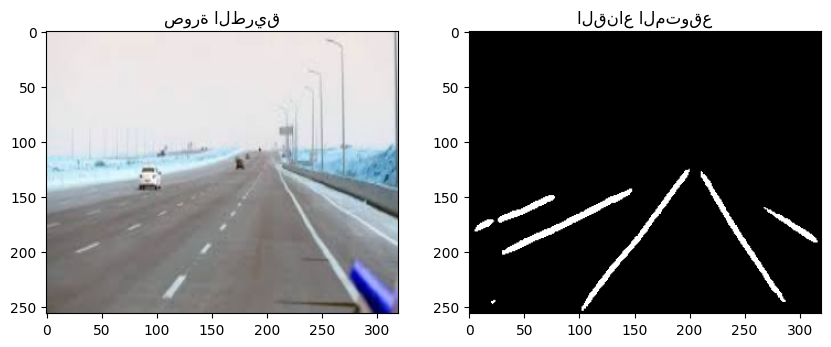

True

In [7]:
# استيراد المكتبات المطلوبة
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# تحميل النموذج المدرب
model = load_model('C:\\Users\\mahmo\\OneDrive\\Desktop\\project_graduation\\lane_detection_model.h5')

# تحميل صورة جديدة (تأكد من تحديث المسار مع صورة جديدة لديك)
new_image_path = 'C:\\Users\\mahmo\\OneDrive\\Desktop\\project_graduation\\test_photo1.jpg'  # قم بتحديث المسار هنا
new_image = cv2.imread(new_image_path)

# تحويل الصورة إلى الحجم المناسب
new_image_resized = cv2.resize(new_image, (320, 256))

# توسيع الأبعاد لتصبح (1, 256, 320, 3)
new_image_input = np.expand_dims(new_image_resized, axis=0)

# التنبؤ باستخدام النموذج المدرب
pred_mask = model.predict(new_image_input)

# تحويل التنبؤ إلى قيم ثنائية (0 أو 1)
pred_mask = (pred_mask >= 0.5).astype('int')

# عرض الصورة الأصلية والقناع المتوقع
plt.figure(figsize=(10, 5))

# عرض صورة الطريق
plt.subplot(1, 2, 1)
plt.imshow(new_image_resized)
plt.title('صورة الطريق')

# عرض القناع المتوقع
plt.subplot(1, 2, 2)
plt.imshow(pred_mask[0], cmap='gray')
plt.title('القناع المتوقع')

plt.show()

# حفظ النتائج
cv2.imwrite('predicted_mask.jpg', pred_mask[0] * 255)  # حفظ القناع المتوقع
